In [1]:
import scipy
import scipy.io as sio
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
from PIL import Image

In [63]:
data_folder = 'B0030'

### Load the BoundingBox.mat file. Beware, not all folders have this file!

In [3]:
def get_bounding_box(data_folder):
    directory = Path.cwd()
    bb_fname = directory.joinpath('data', 'chd_dataset', data_folder, 'BoundingBox.mat')
    bb_content = sio.loadmat(bb_fname)
    bounding_boxes = bb_content.get('bb')
    return bounding_boxes

### Load data from ground_truth.txt

In [64]:
def get_ground_truth(data_folder):
    directory = Path.cwd()
    gt_fname = directory.joinpath('data', 'chd_dataset', data_folder, 'ground_truth.txt')
    ground_truth = np.loadtxt(gt_fname)
    return ground_truth

In [65]:
ground_truth = get_ground_truth(data_folder)
ground_truth

array([[  1., 181., 567.,  79., 296.],
       [  2., 260., 611.,  72., 299.],
       [  3., 266., 610.,  76., 304.],
       [  4., 326., 609.,  74., 309.],
       [  5., 329., 610.,  67., 306.],
       [  6., 339., 611.,  70., 314.],
       [  7., 381., 572.,  93., 333.]])

### Load images and display them with bounding box
This part still needs a lot of clean up!

In [66]:
directory = Path.cwd()
img_path = directory.joinpath('data', 'chd_dataset', data_folder)

In [67]:
def create_filelist():
    filelist = list()
    for entry in os.listdir(img_path):
        if os.path.isfile(os.path.join(img_path, entry)):
            if entry.endswith('.png'):
                print(entry)
                filelist.append(entry)
    return filelist

In [68]:
filelist = create_filelist()

B0030_0001.png
B0030_0002.png
B0030_0003.png
B0030_0004.png
B0030_0005.png
B0030_0006.png
B0030_0007.png


In [50]:
def show_img_with_bounding_box(index):
    pil_path= img_path.joinpath(filelist[index])
    pil_im = Image.open(pil_path, 'r')
    bbox= ground_truth[index]
    img = np.array(pil_im)
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(img)
    ax.set_title(data_folder +' '+  filelist[index])
    # define Rectangle
    rect = patches.Rectangle((bbox[2], bbox[3]),(bbox[1]-bbox[2]), (bbox[4]-bbox[3]),linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    return ax

In [56]:
def show_img(index):
    pil_path= img_path.joinpath(filelist[index])
    pil_im = Image.open(pil_path, 'r')  
    img = np.array(pil_im)
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(img)
    ax.set_title(data_folder +' '+  filelist[index])
    return ax

<Figure size 432x288 with 0 Axes>

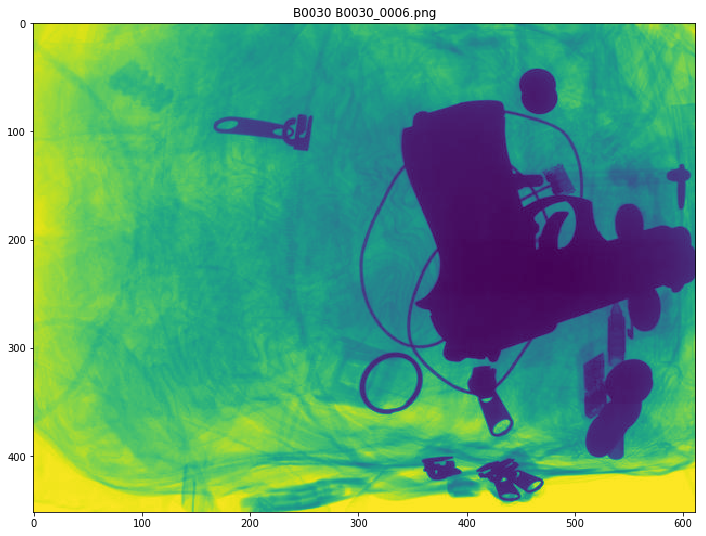

In [69]:
show_img(5)

<Figure size 432x288 with 0 Axes>

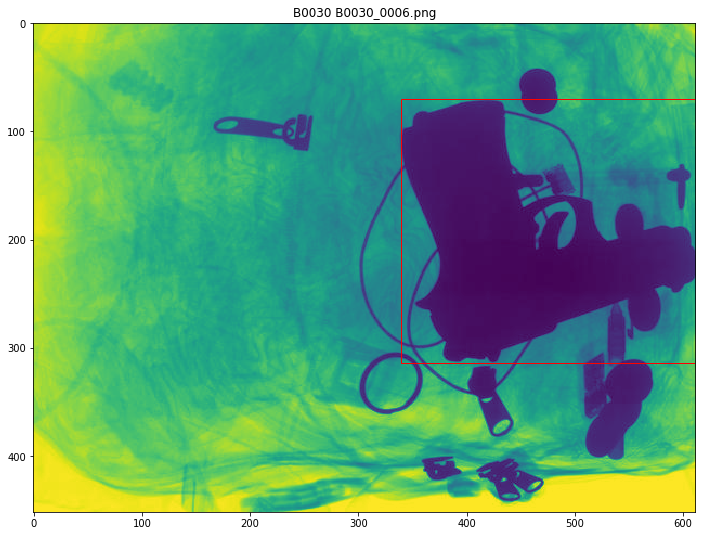

In [70]:
show_img_with_bounding_box(5)